<a href="https://colab.research.google.com/github/Faheemfemu/Email-Campaign-Effectiveness-Prediction-classification/blob/main/Email_Campaign_Effectiveness_Prediction_faheem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Email Campaign Effectiveness Prediction**


##### **Project Type**    - Supervise ML Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:

# Import Libraries
# Importing important libraries and modules
# For data reading and manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# Visualizing missing values
import missingno as msno

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelling
# Train-Test Split
from sklearn.model_selection import train_test_split
# Grid Search for Hyperparameter Tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

#import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

# To ignore warnings
import warnings    
warnings.filterwarnings('ignore')

In [3]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.3 MB/s eta 0:00:00


In [5]:
pip install skopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt


In [6]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.8 MB/s eta 0:00:00


### Dataset Loading

In [8]:
# Load Dataset
#mouting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Load Dataset
path="/content/drive/MyDrive/AlmaBetter/Module 4 Machine Learning/Capstone Project - Supervised ML - Classification/data_email_campaign.csv"
email_data=pd.read_csv(path)

### Dataset First View

In [10]:
# Dataset First Look
email_data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
email_data.shape

(68353, 12)

### Dataset Information

In [12]:
# Dataset Info
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
email_data.duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [15]:
# Missing Value Count Function
def showMissing():
    missing = email_data.columns[email_data.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = email_data[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = email_data[showMissing()].isnull().sum().sort_values(ascending = False)/len(email_data)*100

missingVal
     

,Missing Data Count,Missing Data Percentage
Customer_Location,11595,16.963411
Total_Past_Communications,6825,9.984931
Total_Links,2201,3.220049
Total_Images,1677,2.453440


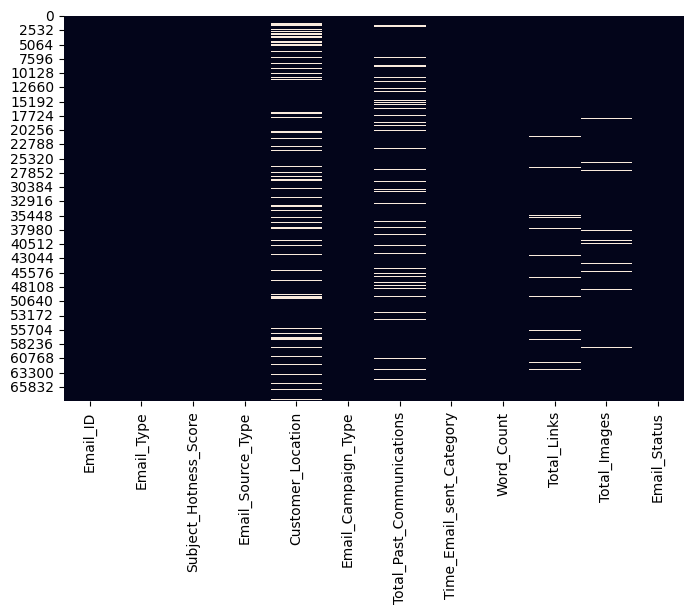

In [16]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(email_data.isnull(),cbar=False);

### What did you know about your dataset?

* Dataset has total of 68353 observation and 12 features.


* Dataset is a mixture of integer, float and object data type.
* Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Features like customer location (11595 i.e., 16.9%), total past communication (6825 i.e., 10%), total link (2201 i.e., 3,2%), total images (1677 i.e., 2.4%) has null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
email_data.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
email_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description 

 * **Email_Id** - Email id of customer
 * **Email_Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business
 * **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
 * **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
 * **Email_Campaign_Type** - The campaign type of the email.
 * **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
 * **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
 * **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
 * **Word_Count**- Total count of word in each email
 * **Total_links** - Total number of links in the email
 * **Total_Images** - Total Number of images in the email
 * **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in email_data.columns:
  print("No. of unique values in '{}' is {}.".format(i, email_data[i].nunique()))
     

No. of unique values in 'Email_ID' is 68353.
No. of unique values in 'Email_Type' is 2.
No. of unique values in 'Subject_Hotness_Score' is 51.
No. of unique values in 'Email_Source_Type' is 2.
No. of unique values in 'Customer_Location' is 7.
No. of unique values in 'Email_Campaign_Type' is 3.
No. of unique values in 'Total_Past_Communications' is 64.
No. of unique values in 'Time_Email_sent_Category' is 3.
No. of unique values in 'Word_Count' is 151.
No. of unique values in 'Total_Links' is 37.
No. of unique values in 'Total_Images' is 45.
No. of unique values in 'Email_Status' is 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking Shape of Email Read
print("No. of Email Read : ",len(email_data[email_data['Email_Status'] == 1]))
# Checking Shape of Email Acknowledged by Reader
print("No. of Email Acknowledged : ",len(email_data[email_data['Email_Status'] == 2]))
# Checking Shape of Email Ignored
print("No. of Email Ignored : ",len(email_data[email_data['Email_Status'] == 0]))

No. of Email Read :  11039
No. of Email Acknowledged :  2373
No. of Email Ignored :  54941


In [ ]:
# Email Status groupby Email_Type
pd.DataFrame(email_data.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Type,Email_Status,Count
0,1,0,39004
1,1,1,8208
2,1,2,1654
3,2,0,15937
4,2,1,2831
5,2,2,719


In [ ]:
# Email Status groupby Email_Source_Type
pd.DataFrame(email_data.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))
     

,Email_Source_Type,Email_Status,Count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


In [ ]:
# Email Status groupby Customer_Location
pd.DataFrame(email_data.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

,Customer_Location,Email_Status,Count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


In [ ]:
# Email Status groupby Email_Campaign_Type
pd.DataFrame(email_data.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Campaign_Type,Email_Status,Count
0,1,1,486
1,1,2,173
2,1,0,77
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


In [ ]:
# Email Status groupby Time_Email_sent_Category
pd.DataFrame(email_data.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

,Time_Email_sent_Category,Email_Status,Count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


In [ ]:
#creating variable to store numerical feature
num_feature = email_data.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature
#word_count have numeric data
     

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [ ]:
#creating variable to store categorial features
cat_feature = [feature for feature in email_data.columns.to_list() if feature not in num_feature]
cat_feature  

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [ ]:
#finding count, sum, mean and median based on Email Type
email_data.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                   1             2
Subject_Hotness_Score     count   4.886600e+04  1.948700e+04
                          sum     6.078070e+04  1.409870e+04
                          mean    1.243824e+00  7.234926e-01
                          median  1.100000e+00  3.000000e-01
Total_Past_Communications count   4.406500e+04  1.746300e+04
                          sum     1.291275e+06  4.889300e+05
                          mean    2.930387e+01  2.799805e+01
                          median  2.900000e+01  2.800000e+01
Total_Links               count   4.728600e+04  1.886600e+04
                          sum     5.241490e+05  1.657850e+05
                          mean    1.108466e+01  8.787501e+00
                          median  9.000000e+00  8.000000e+00
Total_Images              count   4.765500e+04  1.902100e+04
                          sum     1.875460e+05  4.919900e+04
                          mean    3.935495e+00  2.586562e+00
                          median  1.000000e+00  0.000000e+00
Word_Count                count   4.886600e+04  1.948700e+04
                          sum     3.354937e+07  1.429306e+07
                          mean    6.865586e+02  7.334665e+02
                          median  6.780000e+02  7.220000e+02

In [ ]:
#finding count, sum, mean and median based on Email_Source_Type
email_data.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T
     

Email_Source_Type                            1             2
Subject_Hotness_Score     count   3.714900e+04  3.120400e+04
                          sum     4.048740e+04  3.439200e+04
                          mean    1.089865e+00  1.102166e+00
                          median  8.000000e-01  8.000000e-01
Total_Past_Communications count   3.335300e+04  2.817500e+04
                          sum     9.918520e+05  7.883530e+05
                          mean    2.973801e+01  2.798059e+01
                          median  3.000000e+01  2.700000e+01
Total_Links               count   3.595000e+04  3.020200e+04
                          sum     3.628040e+05  3.271300e+05
                          mean    1.009191e+01  1.083140e+01
                          median  9.000000e+00  9.000000e+00
Total_Images              count   3.624400e+04  3.043200e+04
                          sum     1.214220e+05  1.153230e+05
                          mean    3.350127e+00  3.789531e+00
                          median  0.000000e+00  0.000000e+00
Word_Count                count   3.714900e+04  3.120400e+04
                          sum     2.555477e+07  2.228767e+07
                          mean    6.878992e+02  7.142568e+02
                          median  6.840000e+02  7.040000e+02

In [ ]:
#finding count, sum, mean and median based on Customer_Location
email_data.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                            A             B             C  \
Subject_Hotness_Score     count   1.454000e+03  4.341000e+03  5.758000e+03   
                          sum     1.644400e+03  4.847900e+03  6.351100e+03   
                          mean    1.130949e+00  1.116770e+00  1.103005e+00   
                          median  9.000000e-01  9.000000e-01  8.000000e-01   
Total_Past_Communications count   1.300000e+03  3.939000e+03  5.183000e+03   
                          sum     3.697000e+04  1.134620e+05  1.495720e+05   
                          mean    2.843846e+01  2.880477e+01  2.885819e+01   
                          median  2.700000e+01  2.800000e+01  2.800000e+01   
Total_Links               count   1.407000e+03  4.205000e+03  5.573000e+03   
                          sum     1.458700e+04  4.397900e+04  5.869700e+04   
                          mean    1.036745e+01  1.045874e+01  1.053239e+01   
                          median  9.000000e+00  9.000000e+00  9.000000e+00   
Total_Images              count   1.416000e+03  4.236000e+03  5.606000e+03   
                          sum     4.795000e+03  1.543400e+04  2.020200e+04   
                          mean    3.386299e+00  3.643532e+00  3.603639e+00   
                          median  0.000000e+00  0.000000e+00  0.000000e+00   
Word_Count                count   1.454000e+03  4.341000e+03  5.758000e+03   
                          sum     1.004166e+06  3.045906e+06  4.053360e+06   
                          mean    6.906231e+02  7.016600e+02  7.039528e+02   
                          median  6.940000e+02  6.940000e+02  6.940000e+02   

Customer_Location                            D             E             F  \
Subject_Hotness_Score     count   7.406000e+03  1.019300e+04  4.433000e+03   
                          sum     8.187800e+03  1.111640e+04  4.794400e+03   
                          mean    1.105563e+00  1.090592e+00  1.081525e+00   
                          median  8.000000e-01  8.000000e-01  8.000000e-01   
Total_Past_Communications count   6.625000e+03  9.170000e+03  3.980000e+03   
                          sum     1.902230e+05  2.671770e+05  1.150360e+05   
                          mean    2.871291e+01  2.913599e+01  2.890352e+01   
                          median  2.800000e+01  2.900000e+01  2.800000e+01   
Total_Links               count   7.157000e+03  9.872000e+03  4.311000e+03   
                          sum     7.454800e+04  1.020920e+05  4.563100e+04   
                          mean    1.041610e+01  1.034157e+01  1.058478e+01   
                          median  9.000000e+00  9.000000e+00  9.000000e+00   
Total_Images              count   7.244000e+03  9.938000e+03  4.319000e+03   
                          sum     2.547100e+04  3.481300e+04  1.594900e+04   
                          mean    3.516151e+00  3.503019e+00  3.692753e+00   
                          median  0.000000e+00  0.000000e+00  0.000000e+00   
Word_Count                count   7.406000e+03  1.019300e+04  4.433000e+03   
                          sum     5.183849e+06  7.128244e+06  3.099054e+06   
                          mean    6.999526e+02  6.993274e+02  6.990873e+02   
                          median  6.940000e+02  6.940000e+02  6.940000e+02   

Customer_Location                            G  
Subject_Hotness_Score     count   2.317300e+04  
                          sum     2.524040e+04  
                          mean    1.089216e+00  
                          median  8.000000e-01  
Total_Past_Communications count   2.091800e+04  
                          sum     6.057270e+05  
                          mean    2.895721e+01  
                          median  2.900000e+01  
Total_Links               count   2.242900e+04  
                          sum     2.332460e+05  
                          mean    1.039930e+01  
                          median  9.000000e+00  
Total_Images              count   2.261400e+04  
                          sum     7.

In [ ]:
#finding count, sum, mean and median based on Email_Campaign_Type
email_data.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T
     

Email_Campaign_Type                           1             2             3
Subject_Hotness_Score     count      736.000000  4.827300e+04  1.934400e+04
                          sum        111.700000  7.186960e+04  2.898100e+03
                          mean         0.151766  1.488816e+00  1.498191e-01
                          median       0.200000  1.400000e+00  1.000000e-01
Total_Past_Communications count      657.000000  4.347500e+04  1.739600e+04
                          sum          0.000000  1.165934e+06  6.142710e+05
                          mean         0.000000  2.681849e+01  3.531105e+01
                          median       0.000000  2.600000e+01  3.600000e+01
Total_Links               count      706.000000  4.672700e+04  1.871900e+04
                          sum        706.000000  4.997010e+05  1.895270e+05
                          mean         1.000000  1.069405e+01  1.012485e+01
                          median       1.000000  9.000000e+00  9.000000e+00
Total_Images              count      722.000000  4.710600e+04  1.884800e+04
                          sum          0.000000  1.738800e+05  6.286500e+04
                          mean         0.000000  3.691250e+00  3.335367e+00
                          median       0.000000  0.000000e+00  0.000000e+00
Word_Count                count      736.000000  4.827300e+04  1.934400e+04
                          sum     482278.000000  3.330046e+07  1.405970e+07
                          mean       655.269022  6.898360e+02  7.268250e+02
                          median     662.000000  6.840000e+02  7.210000e+02

In [ ]:
#finding count, sum, mean and median based on Time_Email_sent_Category
email_data.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                     1             2             3
Subject_Hotness_Score     count   1.363600e+04  4.112900e+04  1.358800e+04
                          sum     1.518700e+04  4.471570e+04  1.497670e+04
                          mean    1.113743e+00  1.087206e+00  1.102200e+00
                          median  9.000000e-01  8.000000e-01  8.000000e-01
Total_Past_Communications count   1.224400e+04  3.704600e+04  1.223800e+04
                          sum     3.533750e+05  1.074034e+06  3.527960e+05
                          mean    2.886107e+01  2.899190e+01  2.882791e+01
                          median  2.800000e+01  2.800000e+01  2.800000e+01
Total_Links               count   1.319100e+04  3.979800e+04  1.316300e+04
                          sum     1.384270e+05  4.139040e+05  1.376030e+05
                          mean    1.049405e+01  1.040012e+01  1.045377e+01
                          median  9.000000e+00  9.000000e+00  9.000000e+00
Total_Images              count   1.330600e+04  4.011800e+04  1.325200e+04
                          sum     4.736100e+04  1.421880e+05  4.719600e+04
                          mean    3.559372e+00  3.544244e+00  3.561425e+00
                          median  0.000000e+00  0.000000e+00  0.000000e+00
Word_Count                count   1.363600e+04  4.112900e+04  1.358800e+04
                          sum     9.522852e+06  2.883628e+07  9.483300e+06
                          mean    6.983611e+02  7.011180e+02  6.979173e+02
                          median  6.940000e+02  6.940000e+02  6.940000e+02

In [ ]:
#Analyzing mean median and sum based on Email status with respect to numerical features
email_data.groupby('Email_Status')[num_feature].agg(['sum','mean','median']).T

Email_Status                                 0             1             2
Subject_Hotness_Score     sum     6.370730e+04  1.001810e+04  1.154000e+03
                          mean    1.159558e+00  9.075188e-01  4.863043e-01
                          median  1.000000e+00  3.000000e-01  2.000000e-01
Total_Past_Communications sum     1.355183e+06  3.452040e+05  7.981800e+04
                          mean    2.740013e+01  3.470782e+01  3.759680e+01
                          median  2.600000e+01  3.600000e+01  4.000000e+01
Total_Links               sum     5.606030e+05  1.052940e+05  2.403700e+04
                          mean    1.054320e+01  9.854375e+00  1.047364e+01
                          median  9.000000e+00  9.000000e+00  9.000000e+00
Total_Images              sum     1.939020e+05  3.429600e+04  8.547000e+03
                          mean    3.617575e+00  3.187361e+00  3.690415e+00
                          median  0.000000e+00  0.000000e+00  0.000000e+00
Word_Count                sum     3.984633e+07  6.523382e+06  1.472720e+06
                          mean    7.252568e+02  5.909396e+02  6.206153e+02
                          median  7.130000e+02  5.780000e+02  6.100000e+02

In [ ]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(email_data[email_data['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*100)
     

Email Acknowledged based on Email_Type 

Email_Type                                    1              2
Subject_Hotness_Score     sum        984.700000     169.300000
                          mean         0.595345       0.235466
                          median       0.300000       0.200000
Total_Past_Communications sum      59238.000000   20580.000000
                          mean        40.079838      31.906977
                          median      41.000000      36.000000
Total_Links               sum      17978.000000    6059.000000
                          mean        11.222222       8.743146
                          median      11.000000       8.000000
Total_Images              sum       6612.000000    1935.000000
                          mean         4.086527       2.772206
                          median       1.000000       0.000000
Word_Count                sum     990293.000000  482427.000000
                          mean       598.726119     670.969402
              

In [ ]:
#Analyzing mean median sum and count based on Email Opened
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(email_data[email_data['Email_Status']==1].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*100)

Email Opened based on Email_Type 

Email_Type                                   1             2
Subject_Hotness_Score     sum     8.861200e+03  1.156900e+03
                          mean    1.079581e+00  4.086542e-01
                          median  7.000000e-01  2.000000e-01
Total_Past_Communications sum     2.612080e+05  8.399600e+04
                          mean    3.531747e+01  3.293961e+01
                          median  3.600000e+01  3.500000e+01
Total_Links               sum     8.327300e+04  2.202100e+04
                          mean    1.047591e+01  8.048611e+00
                          median  9.000000e+00  8.000000e+00
Total_Images              sum     2.843300e+04  5.863000e+03
                          mean    3.551461e+00  2.128903e+00
                          median  0.000000e+00  0.000000e+00
Word_Count                sum     4.697752e+06  1.825630e+06
                          mean    5.723382e+02  6.448711e+02
                          median  5.650000e+02  6.

In [ ]:
#Analyzing mean median sum and count based on Email Ignored
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(email_data[email_data['Email_Status'] == 0].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*100)

Email Ignored based on Email_Type 

Email_Type                                   1             2
Subject_Hotness_Score     sum     5.093480e+04  1.277250e+04
                          mean    1.305887e+00  8.014369e-01
                          median  1.200000e+00  4.000000e-01
Total_Past_Communications sum     9.708290e+05  3.843540e+05
                          mean    2.758742e+01  2.693818e+01
                          median  2.600000e+01  2.600000e+01
Total_Links               sum     4.228980e+05  1.377050e+05
                          mean    1.120705e+01  8.920451e+00
                          median  1.000000e+01  8.000000e+00
Total_Images              sum     1.525010e+05  4.140100e+04
                          mean    4.009913e+00  2.659195e+00
                          median  1.000000e+00  0.000000e+00
Word_Count                sum     2.786133e+07  1.198500e+07
                          mean    7.143198e+02  7.520239e+02
                          median  7.000000e+02  7

In [ ]:
#calculating engagement rate based on email acknowledged by the readers
engagement_rate = email_data[email_data['Email_Status'] == 2]['Email_Status'].count()/len(email_data)*100
engagement_rate
     

3.4716837593082963

In [ ]:
#calculating open rate based on email read and acknowledged by the readers
open_rate = email_data[email_data['Email_Status'] != 0]['Email_Status'].count()/len(email_data)*100
open_rate

19.62166986086931

In [ ]:
#calculating ignored rate based on email read and acknowledged by the readers
ignored_rate = email_data[email_data['Email_Status'] == 0]['Email_Status'].count()/len(email_data)*100
ignored_rate

80.3783301391307

In [ ]:
# function to calculate engagement rate, open rate and ignored rate 
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [ ]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for - {cat}')
    print(email_data.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for - {cat}')
    print(email_data.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for - {cat}')
    print(email_data.groupby(cat).apply(Ignore))
    print('='*100)

Engagement Rate for - Email_Type
Email_Type
1    0.033848
2    0.036896
dtype: float64


Open Rate for - Email_Type
Email_Type
1    0.201817
2    0.182173
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1    0.798183
2    0.817827
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1    0.038278
2    0.030477
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1    0.203828
2    0.187155
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1    0.796172
2    0.812845
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A    0.033700
B    0.028795
C    0.037166
D    0.033756
E    0.035711
F    0.035191
G    0.035343
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A    0.202201
B    0.193273
C    0.191733
D    0.196597
E    0.201805
F    0.192646
G    0.196953
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A    0.797799
B    0.806727
C    0.808267
D    0.80

In [ ]:
# Link-to-Word ratio
df_Link_to_Word_ratio = email_data['Total_Links'] / email_data['Word_Count']

# Image-to-Word ratio
df_Image_to_Word_ratio = email_data['Total_Images'] / email_data['Word_Count']

# Image-Link-Word ratio
df_Image_Link_Word_ratio = email_data['Total_Images'] + email_data['Total_Links'] / email_data['Word_Count']

# Percentage of words that are links
df_Percentage_of_words_that_are_links = (email_data['Total_Links'] / email_data['Word_Count'])*100

# Number of Images per link
df_Number_of_Images_per_link = email_data['Total_Images'] / email_data['Total_Links']

# Calculating the weighted sum of Subject_Hotness_Score and Total_Past_Communications
df_Hotness_Score = email_data['Subject_Hotness_Score'] * email_data['Total_Past_Communications']
     

In [ ]:
# Image-Link-Word ratio
df_Image_Link_Word_ratio.mean()

3.56208687250181

In [ ]:
# Image-to-Word ratio
df_Image_to_Word_ratio.mean()

0.006425172246013729

In [ ]:
#Link_to_Word_ratio
df_Link_to_Word_ratio.mean()

0.019561519413416703

In [ ]:
#Percentage_of_words_that_are_links
df_Percentage_of_words_that_are_links.mean()

1.9561519413416701

In [ ]:
# Number of Images per link
df_Number_of_Images_per_link.mean()

0.24534715873562615

In [ ]:
#Hotness score
df_Hotness_Score.mean()

26.159572877389156

### What all manipulations have you done and insights you found?

In order to understand email campaign effectiveness, i first started analysis by understanding what percentage of email show customer engagement and bounce or ignore rate.

* No. of Email Read : - 11039 i.e., 17%
* No. of Email Acknowledged : - 2373 i.e., 3%
* No. of Email Ignored : - 54941 i.e., 80%

This result shows that maximum of the emails were ignored, therefore to learn exactly why it was ignore, I tried several grouping of categorial features to better understand the relationship. Then entire result was also being judged by the email status to know exact enagement.


I have also checked the rate how emails were opened, ignored or acknowledeged for each categorial variable. Then also calculated link, image density with respect to total word count. Again using the link and image calculated percentage of each with respect to wordcount. Finally combined subject hotness score and total past communication to calculate the combined weight.


The analysis shows that in order to get emails acknowledged, email should have an average of atleast 37 total communication which is relatively more than those of ignored emails, this shows that emails are acknowledged based on interaction. Other features like word count showed that word count of average 590-600 are acknowledged and it should also contains atmost 10 links and 3 image.


Email type 1 with source 2 location c email campaign type 1 when sent on morning showed effective email with high acknowledged emails.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# code for showing bar percentage
def barPerc(email_data,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in email_data[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
     

#### Chart - 1

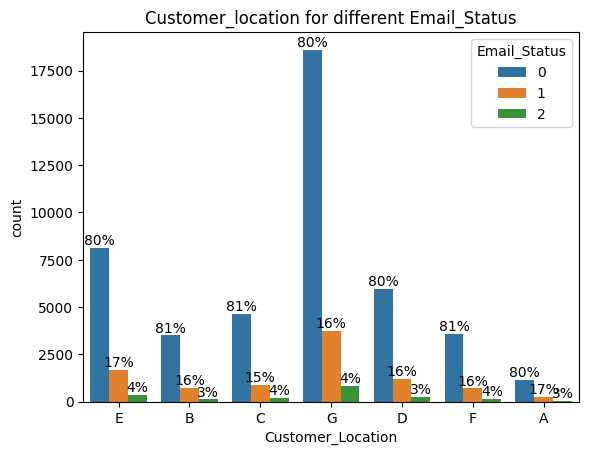

In [ ]:
# Chart - 1 visualization code
ax=sns.countplot(x=email_data['Customer_Location'],hue=email_data["Email_Status"])
plt.title('Customer_location for different Email_Status')
barPerc(email_data,'Customer_Location',ax)


##### 1. Why did you pick the specific chart?

Answer Here.This is required for the analysis of customer location feature.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
 Customer_Location contains highly G values and we can see that it is not making any impact on the dependent variable as the ratio is same. So we can drop the this Customer_Location column

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

<Axes: title={'center': 'Total_Past_Communications Distribution'}, xlabel='Total_Past_Communications', ylabel='Density'>

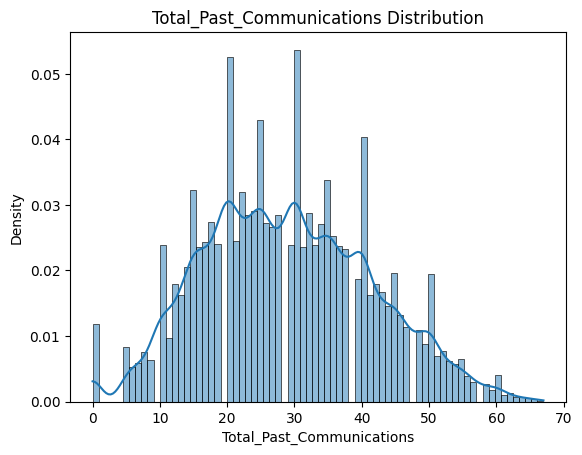

In [ ]:
# Chart - 2 visualization code
#sns.distplot(x=email_data['Total_Past_Communications'],hist=True)
plt.title('Total_Past_Communications Distribution')
sns.histplot(email_data["Total_Past_Communications"], kde=True, stat="density")

##### 1. Why did you pick the specific chart?

Answer Here.To see the distribution of Total Past Communications to get what majority of the data tends to, so that we can fill the null values accordingly.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Total_past_communications seems to normally distributed mostly values lies between 25 to 35.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<ipython-input-51-4fcf9f8e2ac9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=email_data['Total_Links'], hist= True)


Text(0.5, 1.0, 'Total_Links Distribution')

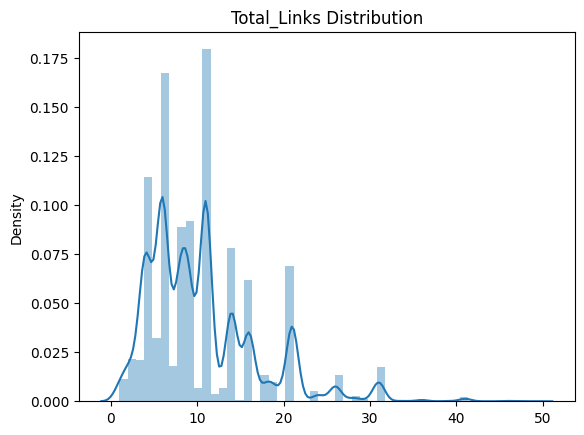

In [ ]:
# Chart - 3 visualization code
sns.distplot(x=email_data['Total_Links'], hist= True)
plt.title('Total_Links Distribution')

##### 1. Why did you pick the specific chart?

Answer Here.
To see the distribution of Total Links to get what majority of the data tends to so that we can fill the null values accordingly.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
It is more or less postively skewed and contain values ranges between to 12.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

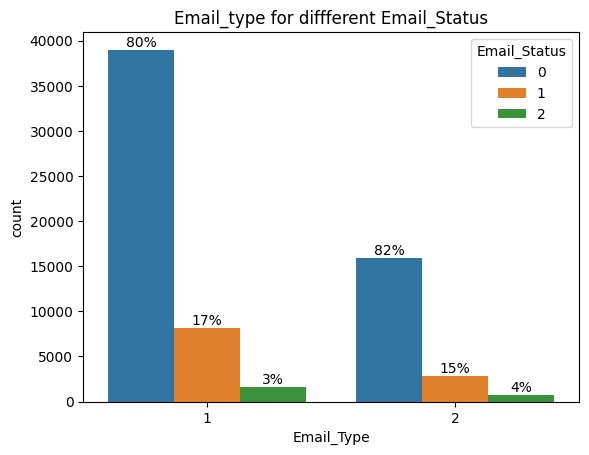

In [ ]:
# Chart - 4 visualization code
ax=sns.countplot(x=email_data['Email_Type'],hue=email_data["Email_Status"])
plt.title('Email_type for diffferent Email_Status')
barPerc(email_data,'Email_Type',ax)

##### 1. Why did you pick the specific chart?

Answer Here.
To do analysis of Email_type, countplot will give the category wise count in a figure.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
There are more promotional emails than important emails i.e there are more 1s than 2s.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
As we can see from the plot that the relation of Email_type with Email_status is not so strong as the ratio being approximately same in each category.

#### Chart - 5

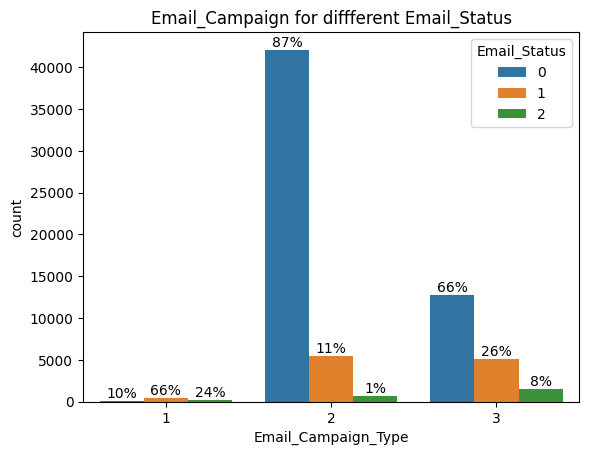

In [ ]:
# Chart - 5 visualization code
ax=sns.countplot(x=email_data['Email_Campaign_Type'],hue=email_data["Email_Status"])
plt.title('Email_Campaign for diffferent Email_Status')
barPerc(email_data,'Email_Campaign_Type',ax)

##### 1. Why did you pick the specific chart?

Answer Here.
To study the analysis of distribution of Email_Campaign_Type.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-

For email_campaign_type 1 there are more 2nd category of email_status which is uneven as generally Email_Status 1 category is maximum in rest other categories.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

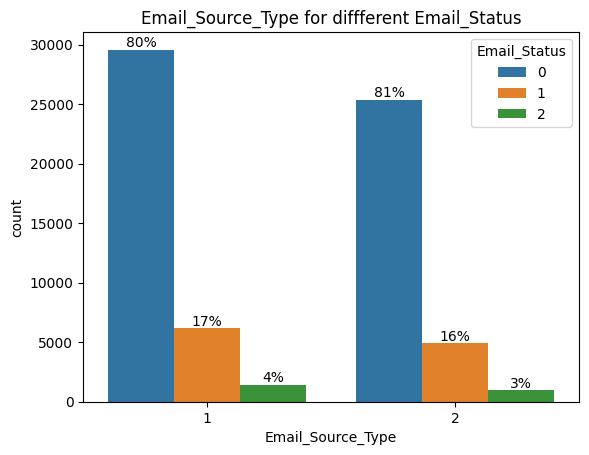

In [ ]:
# Chart - 6 visualization code
ax=sns.countplot(x=email_data['Email_Source_Type'],hue=email_data["Email_Status"])
plt.title('Email_Source_Type for diffferent Email_Status')
barPerc(email_data,'Email_Source_Type',ax)


##### 1. Why did you pick the specific chart?



```
# This is formatted as code
```

Answer Here.
To analyse the Email_Source_Type

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
This seems totally normal, equally distributed categories counts also it is present in more or less in same ratio of categories of Email_Status. It is not much related to Email_Status so we can drop this column.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<ipython-input-62-ab5566e9bfb8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(email_data['Word_Count'],hist=True)


Text(0.5, 1.0, 'Word_count Distribution')

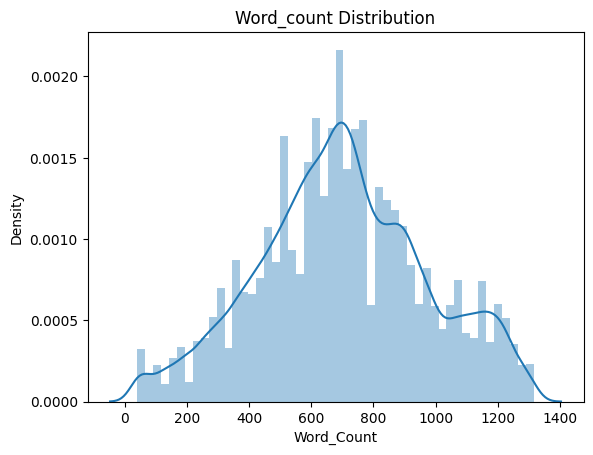

In [ ]:
# Chart - 7 visualization code
sns.distplot(email_data['Word_Count'],hist=True)
plt.title('Word_count Distribution')

##### 1. Why did you pick the specific chart?

Answer Here.
To study the Word_Count distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
More kind normaly distributed with average values arround 600-800.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<ipython-input-63-956fed2ceaf3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(email_data['Total_Images'])


Text(0.5, 1.0, 'Total Images Distribution')

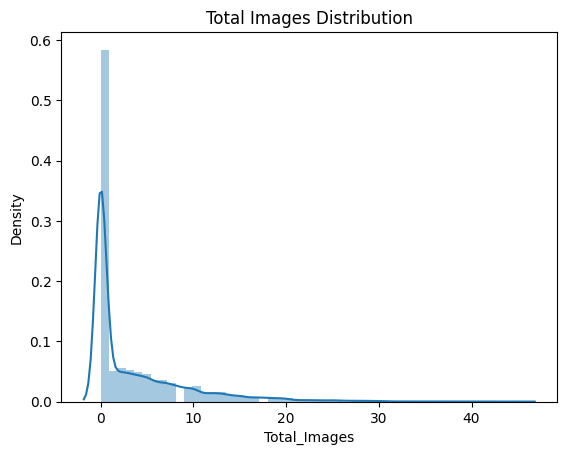

In [ ]:
# Chart - 8 visualization code
sns.distplot(email_data['Total_Images'])
plt.title('Total Images Distribution')

##### 1. Why did you pick the specific chart?

Answer Here.
To study the distribution of Total_Images.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
Total_images is poitively skewed as maximum emails contain less number of images.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<ipython-input-64-7799a78a7d6c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(email_data['Subject_Hotness_Score'])


Text(0.5, 1.0, 'Subject_Hotness_score Distribution')

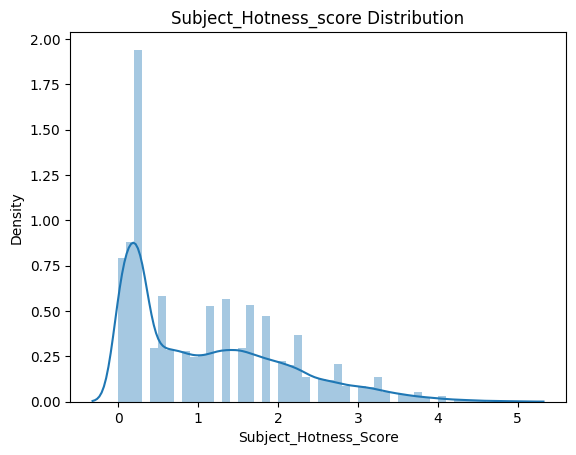

In [ ]:
# Chart - 9 visualization code
sns.distplot(email_data['Subject_Hotness_Score'])
plt.title('Subject_Hotness_score Distribution')

##### 1. Why did you pick the specific chart?

Answer Here.
To study the distribution of Subject_Hotness_score.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
It is kind of positively skewed i.e most of the subject_hotness_score of the emails are low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

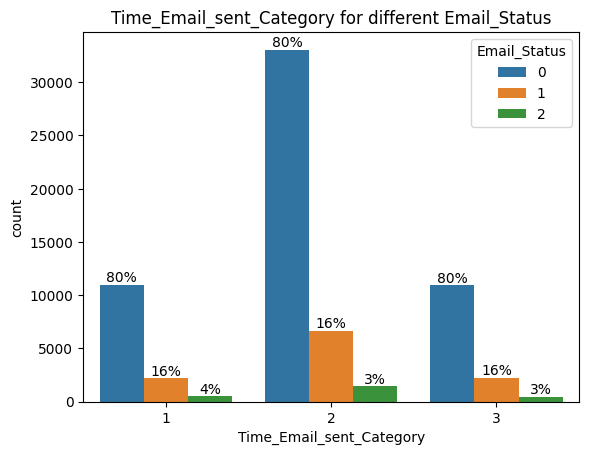

In [ ]:
# Chart - 10 visualization code
ax=sns.countplot(x=email_data['Time_Email_sent_Category'],hue=email_data['Email_Status'])
plt.title('Time_Email_sent_Category for different Email_Status')
barPerc(email_data,'Time_Email_sent_Category',ax)


##### 1. Why did you pick the specific chart?

Answer Here.
To study the time_email_sent_category for diffferent email_status and also the distribution of Time_email_sent_category.

##### 2. What is/are the insight(s) found from the chart?



Answer Here

Most of the emails are sent in the evening time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Text(0.5, 1.0, 'Email_satus distribution')

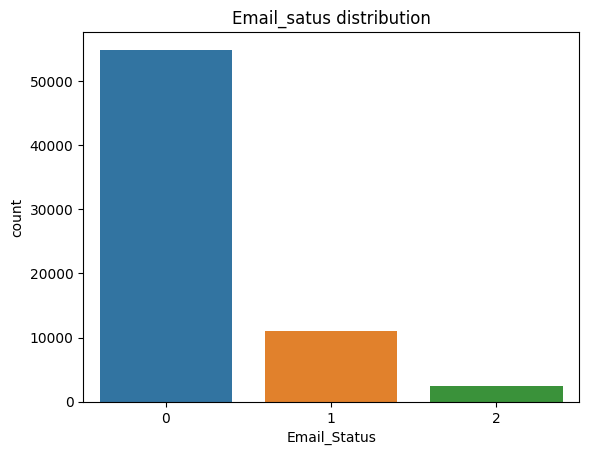

In [ ]:
# Chart - 11 visualization code
# analyis of dependent variable
sns.countplot(x=email_data['Email_Status'])
plt.title('Email_satus distribution')
     

##### 1. Why did you pick the specific chart?

Answer Here.
To study the distribution of dependent variable i.e Email_Status.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
Clearly we can see that it is unbalanced with most values as 0. And very less number of 1 and 2s in the values.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

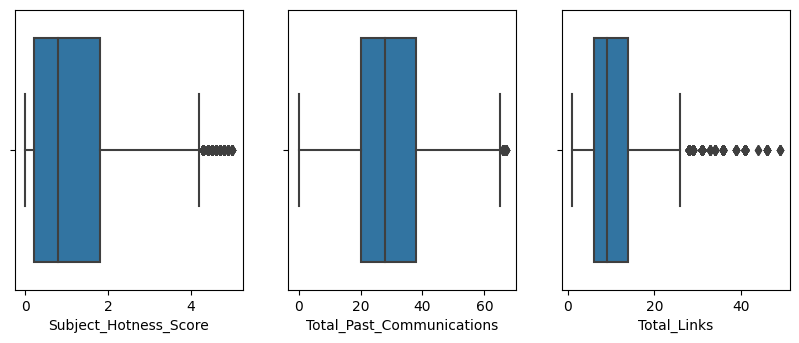

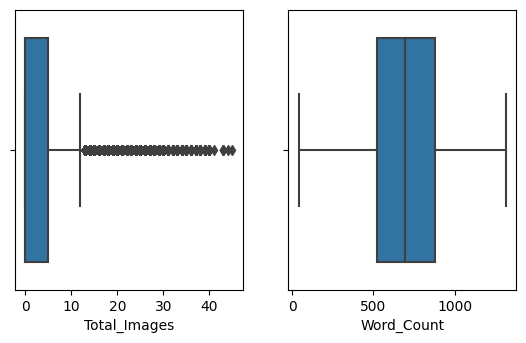

In [ ]:
# Chart - 12 visualization code
df_num = email_data.select_dtypes(include =['float']).copy()
df_num['Word_Count'] = email_data.loc[df_num.index, 'Word_Count'].copy()
idx = 1
fig = plt.figure(figsize = (10,8))
for col in list(df_num.columns):
    if idx <= 3:
            ax1 = fig.add_subplot(2,3,idx)
            sns.boxplot(data = df_num, x=col, ax = ax1)
            
    idx = idx +1
    if idx == 4: 
        fig = plt.figure(figsize = (10,8))
        idx =1

##### 1. Why did you pick the specific chart?

Answer Here.
To analyse the outliers in the numerical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
Total_images,subject_hotness_score and total_links have outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Correlation Heatmap

<Axes: >

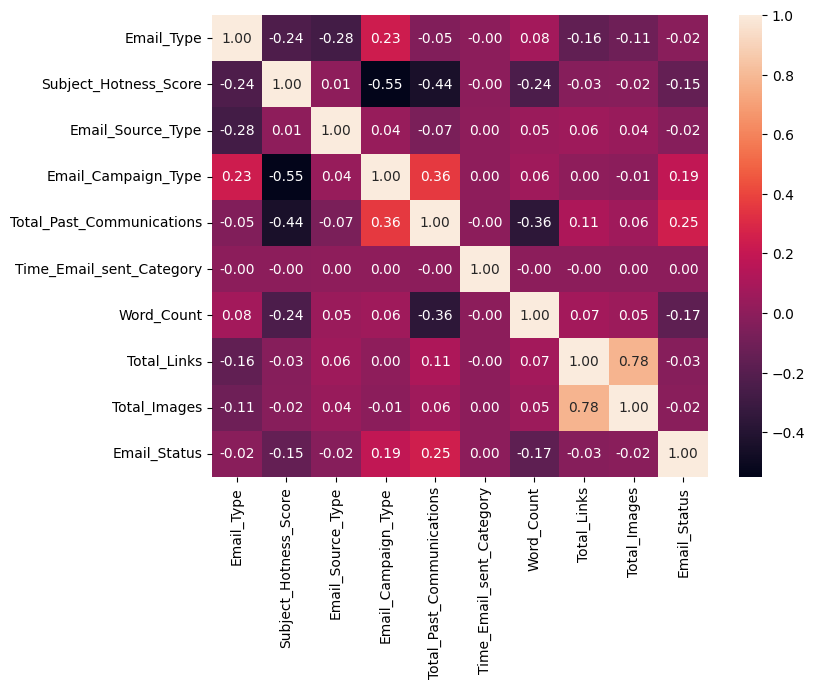

In [ ]:
# Correlation Heatmap visualization code
# heatmap for the continous variables  in order to understand the relationship with dependent variable
plt.figure(figsize=(8,6))
sns.heatmap(email_data.corr(),annot=True,fmt='.2f')
     

##### 1. Why did you pick the specific chart?

Answer Here.
To study the correlation between all the variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
* Total_Images and Total links are multicorrelated with values 0.78
* subject_hotness_score and word_counts are negetively correlated with the dependent_variable Email_Status
* Email_campaign_type and Total_past_communications are possitvely correlated to dependent variable Email_Status.



#### Chart - 14 - Pair Plot 

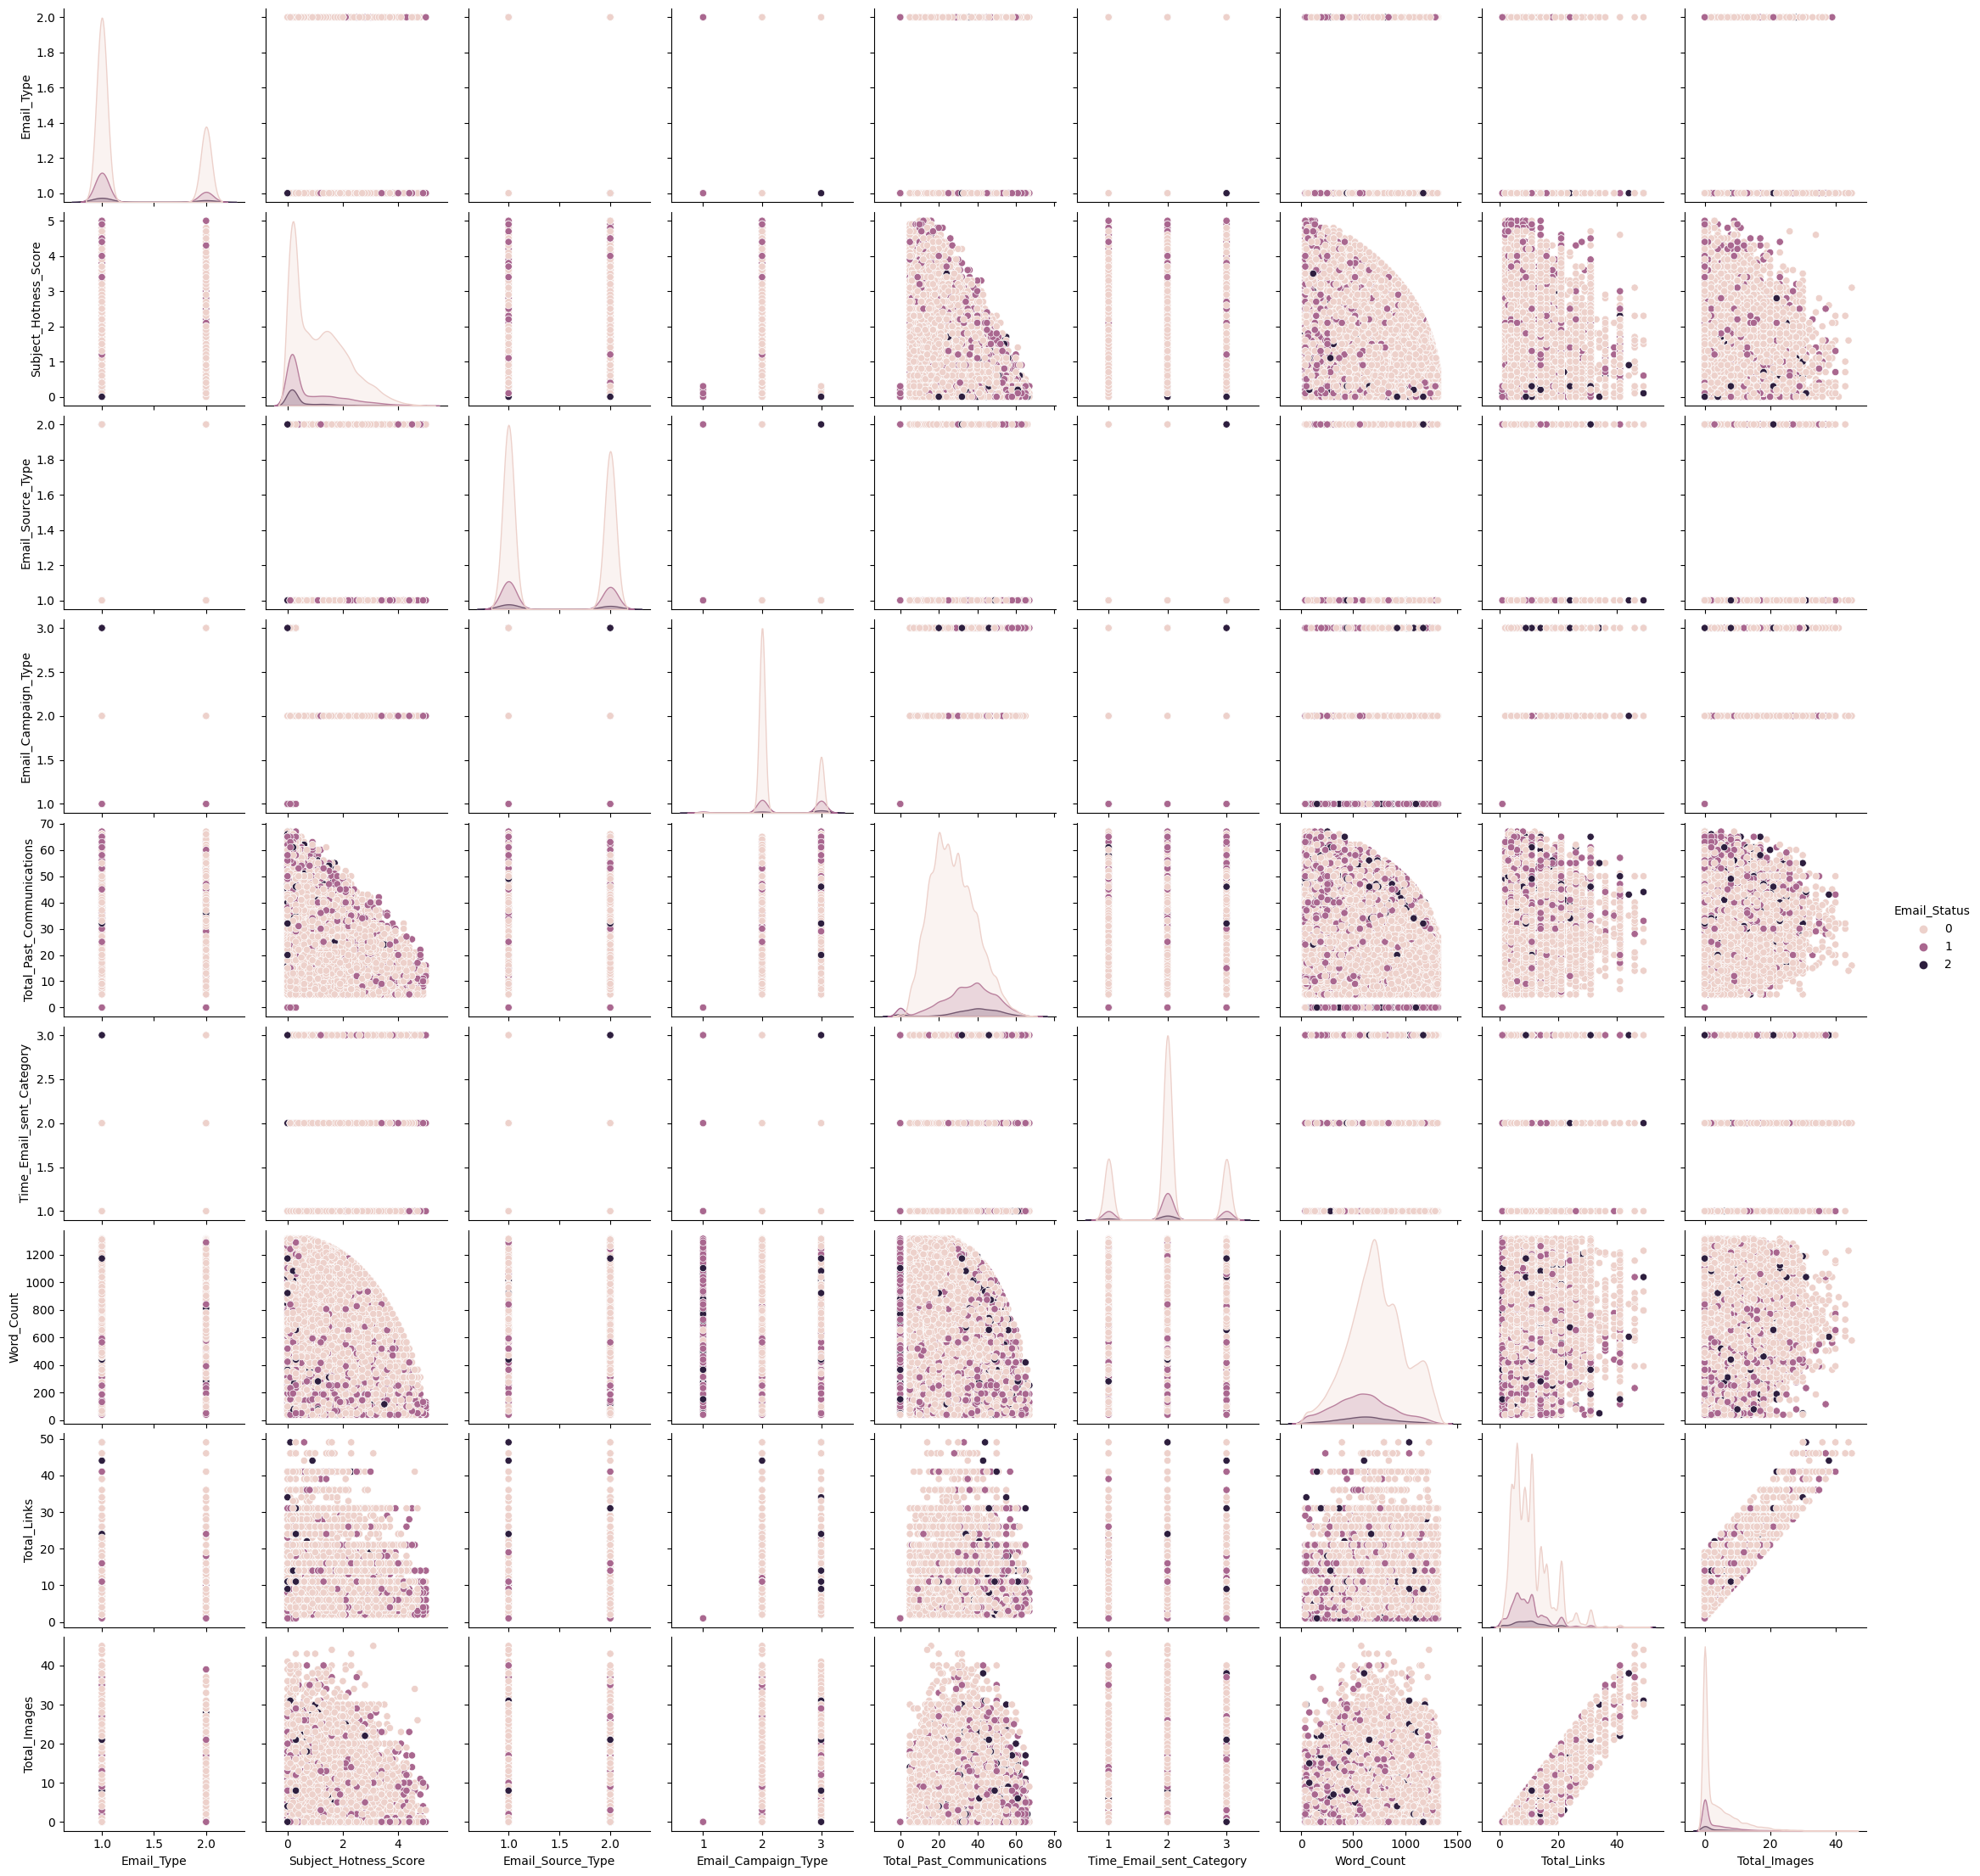

In [ ]:
# Pair Plot visualization code
sns.pairplot(email_data,diag_kind='kde',hue='Email_Status')

##### 1. Why did you pick the specific chart?

Answer Here.
To study the relation of relationship between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Total_links and Total_Images are multicorrelated.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values
Missing values were found in the columns

* Customer_Locattion
* Total_past_Communications
* Total_links
* Total_Images

###As we can see chart 1 irrespective of location the ratio of Email_Status is same throughout .So we can drop the location column.

In [17]:
# Handling Missing Values & Missing Value Imputation
print('Shape of data before dropping ',email_data.shape)
#dropping Customer_Location column
email_data.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)

Shape of data before dropping  (68353, 12)
Shape of data after dropping  (68353, 11)


In [18]:
# Handling Missing Values & Missing Value Imputation
email_data['Total_Past_Communications'].fillna(email_data['Total_Past_Communications'].mean(),inplace=True)
email_data['Total_Links'].fillna(email_data['Total_Links'].mode()[0],inplace=True)
email_data['Total_Images'].fillna(email_data['Total_Images'].mode()[0],inplace=True)
email_data.isnull().sum()


Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.
* As we can observe chart 2 the data is symmetricaly distributed so we can use mean value for imputing missing values.
* AS we can see chart 3 Since the data is not normally distributed we will use Mode to impute missing value.
* As we can see chart 8 Since the data is not normally distributed we will use Mode to impute missing value.

### 2. Handling Outliers

<Axes: >

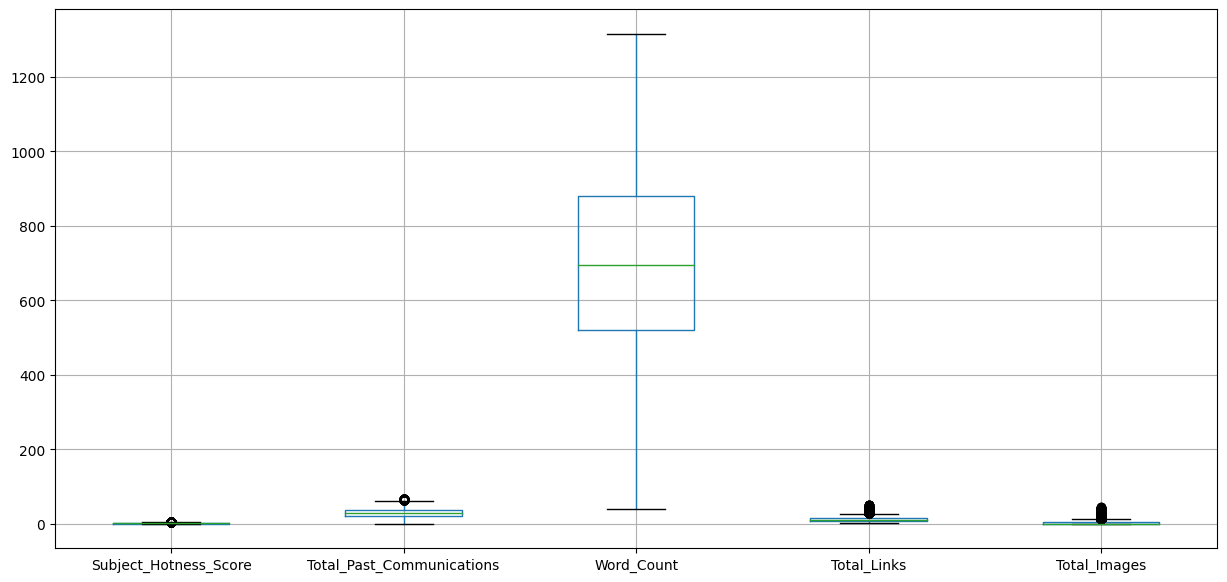

In [19]:
# Handling Outliers & Outlier treatments
#Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(15,7))
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images']
email_data.boxplot(numerical_col)


Except Word_Count column all other numeric column have outliers. Since our dependent variable is highly imbalanced so before dropping outliers we should check that it will not going to delete more than 5% of minority class which is Email_Status =1,2

##### What all outlier treatment techniques have you used and why did you use those techniques?

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Links': {0: 1374, 1: 183, 2: 51}, 'Total_Images': {0: 4680, 1: 697, 2: 208}}


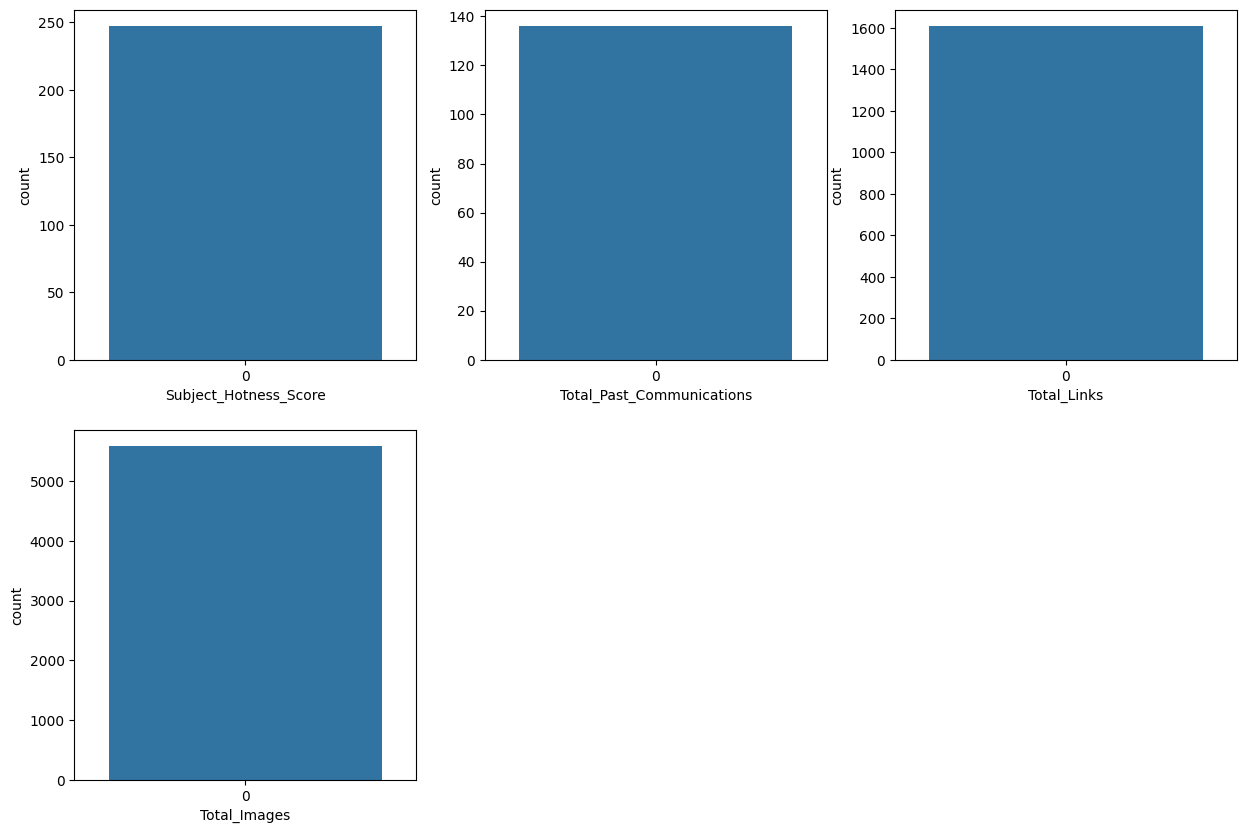

In [20]:
#removing Word_Count because it does'nt have outlier
numerical_col.remove('Word_Count')

fig = plt.figure(figsize = (15,10))
ix = 1
#dictionary d to store the count of each email_status 
d={}
#iterating through each column which have outlier
for x in [y for y in numerical_col]:
    #Finding Quartile
    q3,q1 = np.percentile(email_data.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    intr_qr = q3-q1
    #Fixing Boundaries for outliers
    max = q3+(1.5*intr_qr)
    min = q1-(1.5*intr_qr)
    
    #list y to store email_status of only outliers
    y=[]
    y=email_data.loc[email_data[x] < min]['Email_Status'].tolist()
    y.append(email_data.loc[email_data[x] > max]['Email_Status'].tolist()) 
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)      
    ix = ix +1
print(d)
  

In [21]:
#finding the percentage of minority classs going to be affected by outliers
sum_min=0
sum_maj=0
for x in [y for y in numerical_col]:
  sum_min+=d[x][1]
  sum_min+=d[x][2]
  sum_maj+=d[x][0]
total=email_data.groupby('Email_Status').count()['Email_Type'][1]+email_data.groupby('Email_Status').count()['Email_Type'][2]
total_0=email_data.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_maj/total_0)
print("Percentage of minority class having outliers = ",100*sum_min/total)

Percentage of majority class having outliers =  11.450465044320271
Percentage of minority class having outliers =  9.580972263644497


Answer Here.

The outliers are removed if we found that dropping the outliers values wouldnt affect the minority class i.e Email_Status values 1 and 2 , here the majority class is Email_Status value 0.

* As the percentage of data will be lost if we drop the outliers is more than 5% for minority class. So we will not drop the outliers.

### 3. Categorical Encoding

In [22]:
# Encode your categorical columns
categorical=['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

email_data = pd.get_dummies(email_data,columns=categorical,drop_first=True)

email_data.head(3)



,Email_ID,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Email_Type_2,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,EMA00081000034500,2.2,33.0,440,8.0,0.0,0,0,1,1,0,0,0
1,EMA00081000045360,2.1,15.0,504,5.0,0.0,0,1,0,1,0,1,0
2,EMA00081000066290,0.1,36.0,962,5.0,0.0,1,1,0,0,1,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.
Categorical techniques that is used for categorical encoding is dummification with k-1 variables to be safe from dummy trap.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [23]:
# Manipulate Features to minimize feature correlation and create new features
#As we know that total_links and total _images are multicorrelated 
#so we can construct feature based on both the variables, since dropping anyone variable is ambiguous as they have approximately same effects on the dependent variable
email_data['Links_Images']=email_data['Total_Links']+email_data['Total_Images']
#Dropping Email_ID column
email_data.drop('Email_ID',inplace=True,axis=1)

#### 2. Feature Selection

In [24]:
email_data.columns

Index(['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count',
       'Total_Links', 'Total_Images', 'Email_Status', 'Email_Type_2',
       'Email_Source_Type_2', 'Email_Campaign_Type_2', 'Email_Campaign_Type_3',
       'Time_Email_sent_Category_2', 'Time_Email_sent_Category_3',
       'Links_Images'],
      dtype='object')

In [25]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import chi2
p_val_f_val=chi2(email_data.drop('Email_Status',axis=1),email_data['Email_Status'])
p_val_f_val
     

(array([1.36579326e+03, 1.88720088e+04, 2.59026873e+05, 3.91608941e+02,
        4.87242798e+02, 3.92069627e+01, 2.38369041e+01, 1.54584125e+03,
        2.75522291e+03, 6.59315342e-02, 8.20735357e-01, 7.89795712e+02]),
 array([2.64096441e-297, 0.00000000e+000, 0.00000000e+000, 9.18753207e-086,
        1.57242820e-106, 3.06419371e-009, 6.66625672e-006, 0.00000000e+000,
        0.00000000e+000, 9.67571682e-001, 6.63406285e-001, 3.14804051e-172]))

In [26]:
p_val=pd.Series(p_val_f_val[1])
p_val.index=email_data.drop('Email_Status',axis=1).columns
p_val.sort_index(ascending=False)
     

Word_Count                     0.000000e+00
Total_Past_Communications      0.000000e+00
Total_Links                    9.187532e-86
Total_Images                  1.572428e-106
Time_Email_sent_Category_3     6.634063e-01
Time_Email_sent_Category_2     9.675717e-01
Subject_Hotness_Score         2.640964e-297
Links_Images                  3.148041e-172
Email_Type_2                   3.064194e-09
Email_Source_Type_2            6.666257e-06
Email_Campaign_Type_3          0.000000e+00
Email_Campaign_Type_2          0.000000e+00
dtype: float64

### Using Mutual Information Gain method to select features

<Axes: >

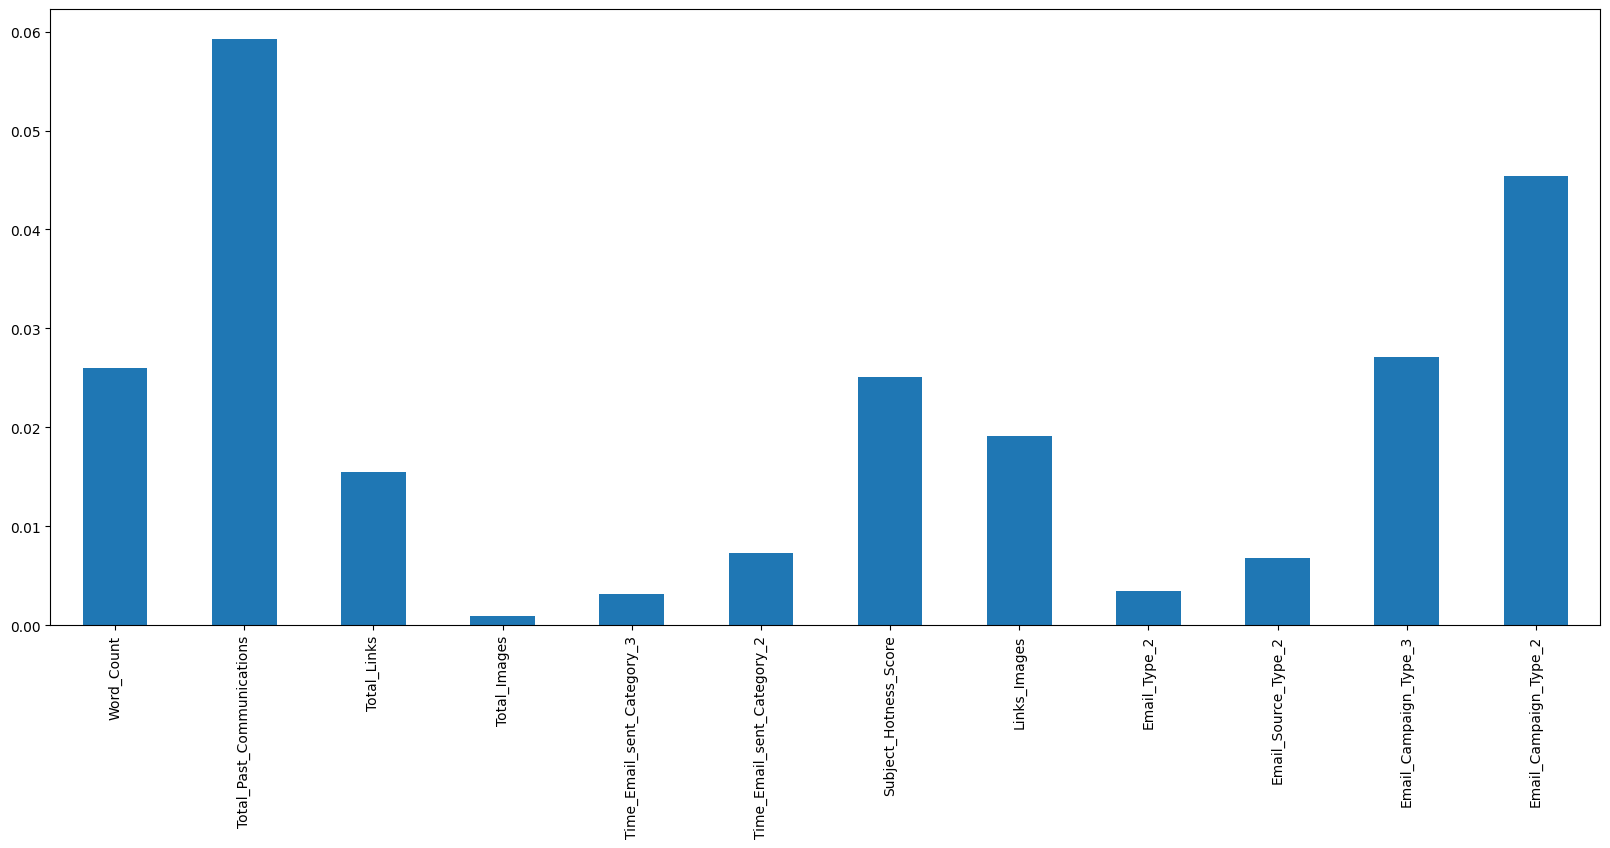

In [27]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_gain=mutual_info_classif(email_data.drop('Email_Status',axis=1),email_data['Email_Status'])
mutual_info_gain=pd.Series(mutual_info_gain)
mutual_info_gain.index=email_data.drop('Email_Status',axis=1).columns
mutual_info_gain.sort_index(ascending=False).plot.bar(figsize=(20,8))

##### What all feature selection methods have you used  and why?

Answer Here.

Using Chi Square method, the lesser the p_values are higher will be the importance

Mutual Information gain method is also used, higher the values of mutual_info_gain higher is the importance.

##### Which all features you found important and why?

Answer Here.

**Based on all this techniques we selected our features as**
* email_attachments
* Total_Past_Communications
* Subject_Hotness_Score
* Email_source_type
* Email_Campaign_Type
* Word_Count

**We would like to drop**

* Total_Images
* Total_links
* Time_Email_sent_Category
* Email_Type

In [28]:
#droping less important feature
email_data.drop(['Email_Type_2','Time_Email_sent_Category_2','Time_Email_sent_Category_3','Total_Images','Total_Links'],inplace=True,axis=1)

In [29]:
email_data.head(1)
     

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Links_Images
0,2.2,33.0,440,0,1,1,0,8.0


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Not required

### 6. Data Scaling

In [30]:
# Scaling your data
numerical_column=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
for col in numerical_column:
    email_data[col] = (email_data[col] - email_data[col].min()) / (email_data[col].max() - email_data[col].min())

email_data.head(3)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Links_Images
0,0.44,0.492537,0.313480,0,1,1,0,0.076087
1,0.42,0.223881,0.363636,0,0,1,0,0.043478
2,0.02,0.537313,0.722571,1,0,0,1,0.043478


##### Which method have you used to scale you data and why?

Normalization technique Min - Max Scalling is applied here as it scales the data between 0 to 1 it would scale down the different facotor ranges to 0 to 1 so that they all have equal importance during the Weight Updation.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.
For this problem dimensionality reduction is not required as we dont have much dimension

### 8. Data Splitting

In [31]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=email_data.drop('Email_Status',axis=1)
y=email_data['Email_Status']

print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (68353, 7)
Shape of Y: (68353,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3,stratify=y)

##### What data splitting ratio have you used and why? 

Answer Here.
* Taking a 80-20 train test split.
* We need to use the stratify parameter inorder to make sure that the train and test datasets have the same ratios of the predictor variables.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

Upsampling is required as our data is highly imbalanced

* As we have 3 categories of dependent variable among which class 0 is high and other two classes are very less.

**Random Under Sampling**

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X_train,y_train)

print('Original dataset shape:', len(X_train))
print('Resampled dataset shape', len(y_rus))
     

Original dataset shape: 54682
Resampled dataset shape 5694


**Synthetic Minority Oversampling Technique (SMOTE**)

In [48]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train,y_train)

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(y_smote))
     

Original dataset shape 54682
Resampled dataset shape 131859


**Under-Sampling: Tomek links**

In [49]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(X_train,y_train)

print('Original dataset shape:', len(X_train))
print('Resampled dataset shape', len(y_tl))

Original dataset shape: 54682
Resampled dataset shape 47618


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

Techniques that are used to handle the imbalance dataset are

* **RANDOM UNDER SAMPLING**
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.
* **SMOTE**
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
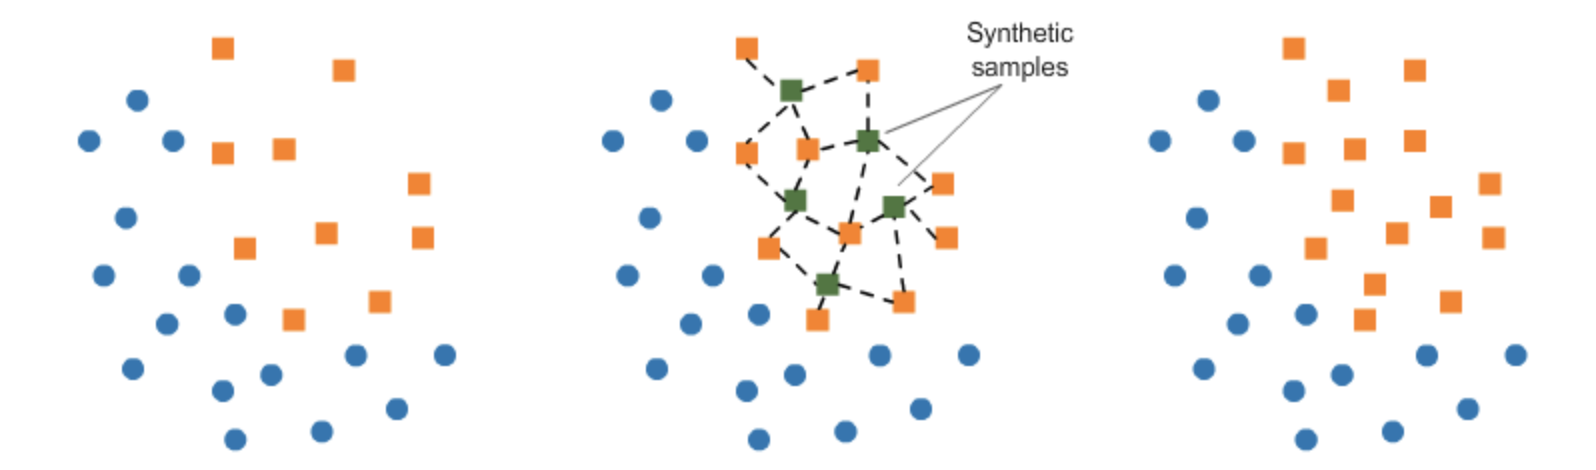
 **Tomek links**
 Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other.
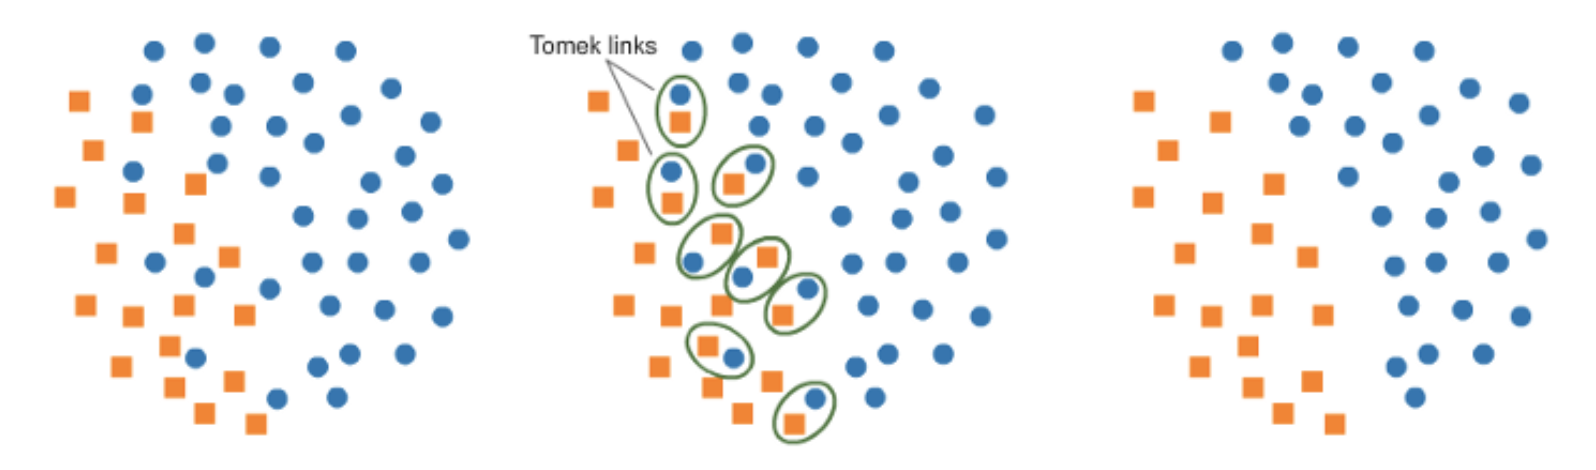

## ***7. ML Model Implementation***

In [42]:
#Creating dataframe for storing model evaluated metrics.
column_name=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model=pd.DataFrame(columns=column_name)
def evaluate_model(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  res = {column_name[i]: list_score[i] for i in range(len(column_name))}
  

  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return res
     

### ML Model - 1

**Decision Trees Classifier**

----- Evaluation on train data -----

Confusion matrix 

[[43948     5     0]
 [  174  8653     4]
 [   51    58  1789]]

 Accuracy =  0.9946600343806006

 Recall =  0.9946600343806006

 Precision =  0.9946610423873069

 F1 score =  0.9946214488278734

 Roc_Auc score =  0.9999360300445349


----- Evaluation on test data -----

Confusion matrix 

[[9097 1594  297]
 [1399  645  164]
 [ 269  160   46]]

 Accuracy =  0.7159681076731768

 Recall =  0.7159681076731768

 Precision =  0.7257838425347929

 F1 score =  0.7207239936255044

 Roc_Auc score =  0.5694137879177097


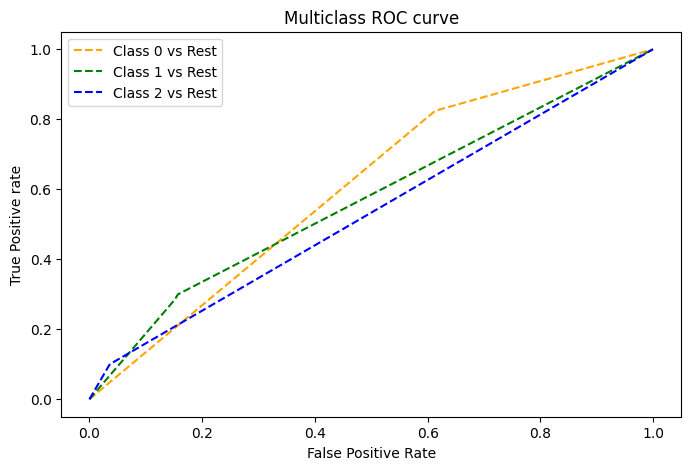

In [50]:
# ML Model - 1 Implementation
# defining empty dictionary for holding the results
final_dict={}

DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train,y_train)
# Fit the Algorithm
DT_classifier.fit(X_train,y_train)
# Predict on the model

result=evaluate_model(DT_classifier,X_train,y_train,X_test,y_test,'Decision_Tree_On_Original_data_with_default_parameters')
final_dict['Decision_Tree_On_Original_data_with_default_parameters']=result


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart
final_dict['Decision_Tree_On_Original_data_with_default_parameters']

{'MODEL_NAME': 'Decision_Tree_On_Original_data_with_default_parameters',
 'F1_SCORE_Train': 0.9946214488278734,
 'PRECISION_Train': 0.9946610423873069,
 'RECALL__Train': 0.9946600343806006,
 'ACCURACY_Train': 0.9946600343806006,
 'ROC_AUC_Train': 0.9999360300445349,
 'F1_SCORE_Test': 0.7207239936255044,
 'PRECISION_Test': 0.7257838425347929,
 'RECALL__Test': 0.7159681076731768,
 'ACCURACY_Test': 0.7159681076731768,
 'ROC_AUC_Test': 0.5694137879177097}

Decision tree with Random Under Sampling

----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   3 1895    0]
 [   2    7 1889]]

 Accuracy =  0.9978925184404637

 Recall =  0.9978925184404637

 Precision =  0.9978974110463324

 F1 score =  0.9978921421294408

 Roc_Auc score =  0.999995188398266


----- Evaluation on test data -----

Confusion matrix 

[[5618 3025 2345]
 [ 636  759  813]
 [ 109  140  226]]

 Accuracy =  0.48299319727891155

 Recall =  0.48299319727891155

 Precision =  0.7432006344782711

 F1 score =  0.5645338562860256

 Roc_Auc score =  0.5898060720409758


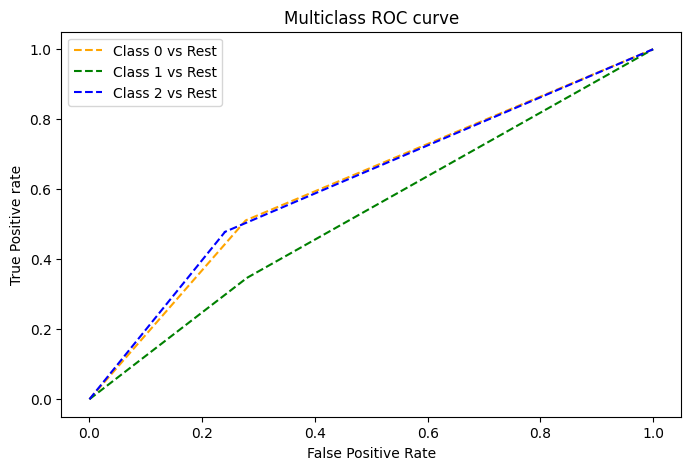

In [51]:
DT_classifier_rus = DecisionTreeClassifier()

# Fit the Algorithm
DT_classifier_rus.fit(x_rus,y_rus)
# Predict on the model

result=evaluate_model(DT_classifier_rus,x_rus,y_rus,X_test,y_test,'Decision_Tree_Random_undersampling_with_default_parameters')
final_dict['Decision_Tree_Random_undersampling_with_default_parameters']=result

**Decision Tree with SMOTE data**

----- Evaluation on train data -----

Confusion matrix 

[[43948     5     0]
 [  174 43775     4]
 [   51    58 43844]]

 Accuracy =  0.9977855133134637

 Recall =  0.9977855133134637

 Precision =  0.9977926857317884

 F1 score =  0.9977859810471562

 Roc_Auc score =  0.9999946452468507


----- Evaluation on test data -----

Confusion matrix 

[[8872 1707  409]
 [1301  669  238]
 [ 241  175   59]]

 Accuracy =  0.7022163704191354

 Recall =  0.7022163704191354

 Precision =  0.7299942621478732

 F1 score =  0.7152504321071185

 Roc_Auc score =  0.5760837322918594


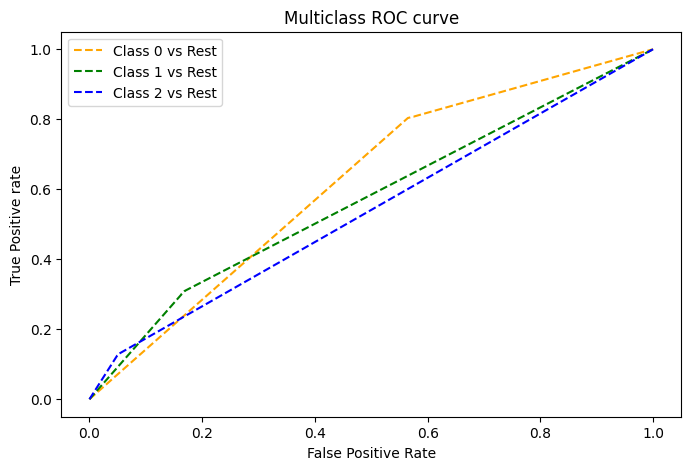

In [52]:
DT_classifier = DecisionTreeClassifier()

# Fit the Algorithm
DT_classifier.fit(x_smote,y_smote)
# Predict on the model

result=evaluate_model(DT_classifier,x_smote,y_smote,X_test,y_test,'Decision_Tree_On_SMOTE_data_with_default_parameters')
final_dict['Decision_Tree_On_SMOTE_data_with_default_parameters']=result

**Decision tree with Tomek link data**

----- Evaluation on train data -----

Confusion matrix 

[[40309     5     0]
 [  174  5228     4]
 [   51    58  1789]]

 Accuracy =  0.993867865093032

 Recall =  0.993867865093032

 Precision =  0.9938598354900909

 F1 score =  0.9938134778496203

 Roc_Auc score =  0.9999029688987754


----- Evaluation on test data -----

Confusion matrix 

[[9453 1152  383]
 [1459  529  220]
 [ 280  132   63]]

 Accuracy =  0.7347670250896058

 Recall =  0.7347670250896058

 Precision =  0.7292724335686799

 F1 score =  0.7314370699663959

 Roc_Auc score =  0.5747004972549261


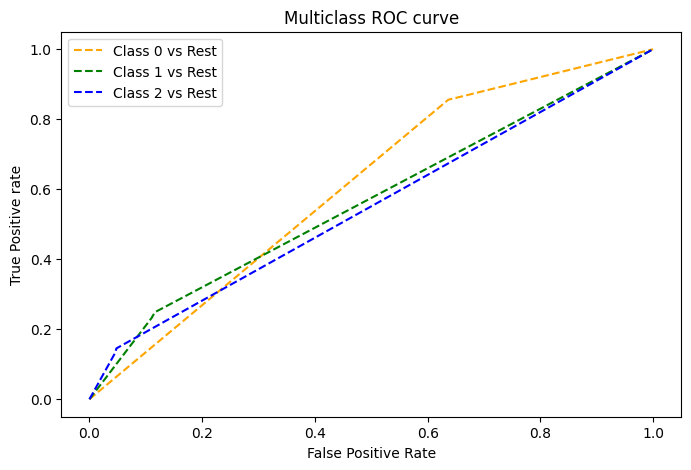

In [53]:
DT_classifier = DecisionTreeClassifier()

# Fit the Algorithm
DT_classifier.fit(X_tl, y_tl)
# Predict on the model

result=evaluate_model(DT_classifier,X_tl, y_tl,X_test,y_test,'Decision_Tree_On_SMOTETomek_data_with_default_parameters')
final_dict['Decision_Tree_On_SMOTETomek_data_with_default_parameters']=result
     

#### 2. Cross- Validation & Hyperparameter Tuning

**Hypertunning Decision Tree with Original Data**

Fitting 3 folds for each of 198 candidates, totalling 594 fits
----- Evaluation on train data -----

Confusion matrix 

[[43527   422     4]
 [ 7679  1138    14]
 [ 1577   245    76]]

 Accuracy =  0.8182034307450349

 Recall =  0.8182034307450349

 Precision =  0.792722763202299

 F1 score =  0.7605511563592023

 Roc_Auc score =  0.8126340152119683


----- Evaluation on test data -----

Confusion matrix 

[[10808   174     6]
 [ 1978   217    13]
 [  412    57     6]]

 Accuracy =  0.8068904981347378

 Recall =  0.8068904981347378

 Precision =  0.7447666283703442

 F1 score =  0.7455645001481243

 Roc_Auc score =  0.7608893680265014


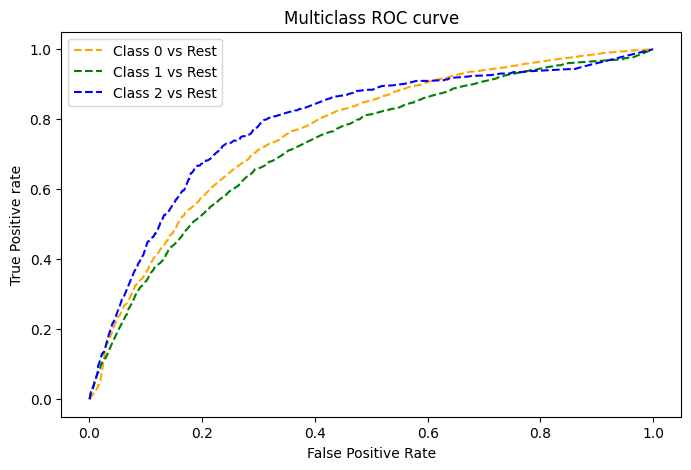

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
DT_optimized_original = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]},
    n_iter = 250, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
DT_optimized_original.fit(X_train,y_train)
# best parameters
DT_optimized_original_best_params=DT_optimized_original.best_params_
# Fit the Algorithm
DT_optimized_original_data = DecisionTreeClassifier(min_samples_split=DT_optimized_original_best_params['min_samples_split'],
                                 max_depth=DT_optimized_original_best_params['max_depth'],
                                 min_samples_leaf=DT_optimized_original_best_params['min_samples_leaf'],
                                 max_features=DT_optimized_original_best_params['max_features'],
                                 random_state=0)
DT_optimized_original_data.fit(X_train,y_train)
# Predict on the model

result=evaluate_model(DT_optimized_original_data,X_train,y_train,X_test,y_test,'Decision_Tree_Optimized_Original_data')
final_dict['Decision_Tree_Optimized_Original_data']=result

**Hypertunning Decision Tree with Random Undersampling**

Fitting 3 folds for each of 198 candidates, totalling 594 fits
----- Evaluation on train data -----

Confusion matrix 

[[1304  311  283]
 [ 335  975  588]
 [ 226  364 1308]]

 Accuracy =  0.6299613628380751

 Recall =  0.6299613628380751

 Precision =  0.6301267190108643

 F1 score =  0.6281059089773366

 Roc_Auc score =  0.821603851206028


----- Evaluation on test data -----

Confusion matrix 

[[6387 2647 1954]
 [ 563  714  931]
 [  74  121  280]]

 Accuracy =  0.5399019822982957

 Recall =  0.5399019822982957

 Precision =  0.767046385891756

 F1 score =  0.6158900918410721

 Roc_Auc score =  0.686498186288215


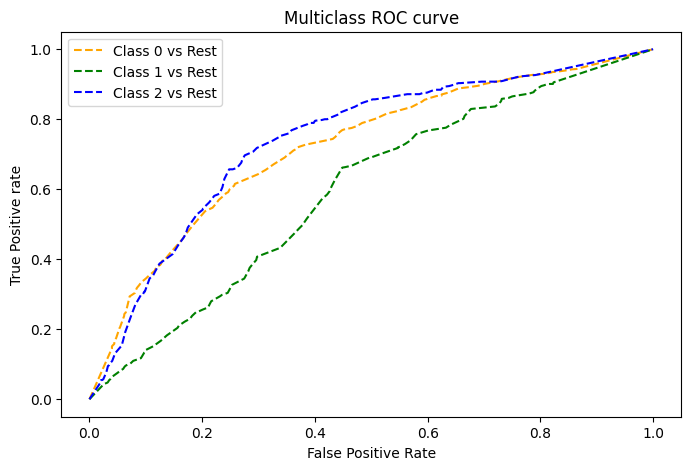

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
DT_optimized_rus = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]},
    n_iter = 250, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
DT_optimized_rus.fit(x_rus,y_rus)
# best parameters
DT_optimized_rus_best_params=DT_optimized_rus.best_params_
# Fit the Algorithm
DT_optimized_rus_data = DecisionTreeClassifier(min_samples_split=DT_optimized_rus_best_params['min_samples_split'],
                                 max_depth=DT_optimized_rus_best_params['max_depth'],
                                 min_samples_leaf=DT_optimized_rus_best_params['min_samples_leaf'],
                                 max_features=DT_optimized_rus_best_params['max_features'],
                                 random_state=0)
DT_optimized_rus_data.fit(x_rus,y_rus)
# Predict on the model

result=evaluate_model(DT_optimized_rus_data,x_rus,y_rus,X_test,y_test,'Deciosion_Tree_optimized_random_undersampling_data')
final_dict['Decision_Tree_optimized_random_undersampling_data']=result

**Hypertunning Decision Tree with SMOTE**

Fitting 3 folds for each of 198 candidates, totalling 594 fits
----- Evaluation on train data -----

Confusion matrix 

[[33568  4015  6370]
 [12559 12045 19349]
 [ 5400  5288 33265]]

 Accuracy =  0.5981995919884119

 Recall =  0.5981995919884119

 Precision =  0.5932174176632061

 F1 score =  0.5727889103401616

 Roc_Auc score =  0.7855977860145215


----- Evaluation on test data -----

Confusion matrix 

[[8329 1097 1562]
 [ 899  502  807]
 [ 123  120  232]]

 Accuracy =  0.662936142198815

 Recall =  0.662936142198815

 Precision =  0.7661662108588942

 F1 score =  0.7048151383117455

 Roc_Auc score =  0.71574563940977


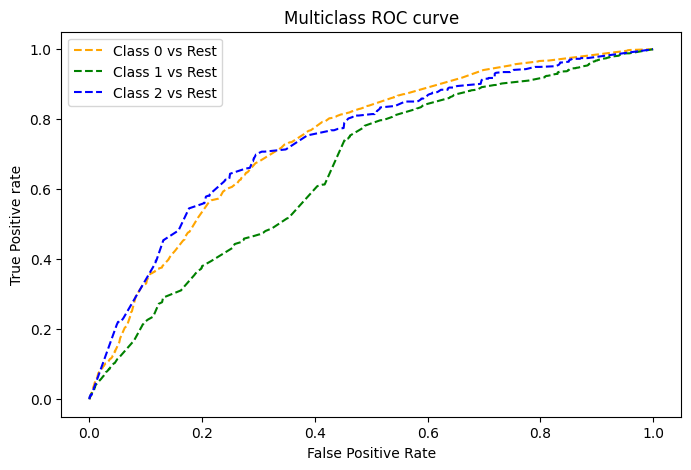

In [55]:
DT_optimized_SMOTE = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]},
    n_iter = 250, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
DT_optimized_SMOTE.fit(x_smote,y_smote)
# best parameters
DT_optimized_SMOTE_best_params=DT_optimized_SMOTE.best_params_
# Fit the Algorithm
DT_optimized_SMOTE_data = DecisionTreeClassifier(min_samples_split=DT_optimized_SMOTE_best_params['min_samples_split'],
                                 max_depth=DT_optimized_SMOTE_best_params['max_depth'],
                                 min_samples_leaf=DT_optimized_SMOTE_best_params['min_samples_leaf'],
                                 max_features=DT_optimized_SMOTE_best_params['max_features'],
                                 random_state=0)
DT_optimized_SMOTE_data.fit(x_smote,y_smote)
# Predict on the model

result=evaluate_model(DT_optimized_SMOTE_data,x_smote,y_smote,X_test,y_test,'Decision_Tree_Optimized_SMOTE_data')
final_dict['Decision_Tree_Optimized_SMOTE_data']=result

**Hypertunning Decision Tree with Tomeklink**

Fitting 3 folds for each of 198 candidates, totalling 594 fits
----- Evaluation on train data -----

Confusion matrix 

[[39815   489    10]
 [ 4287  1109    10]
 [ 1463   347    88]]

 Accuracy =  0.8612709479608551

 Recall =  0.8612709479608551

 Precision =  0.8369850183178751

 F1 score =  0.8227604915869081

 Roc_Auc score =  0.8387995932465474


----- Evaluation on test data -----

Confusion matrix 

[[10742   239     7]
 [ 1887   299    22]
 [  385    83     7]]

 Accuracy =  0.8081340062906883

 Recall =  0.8081340062906883

 Precision =  0.7479462932043599

 F1 score =  0.7545181137666056

 Roc_Auc score =  0.7511620956480553


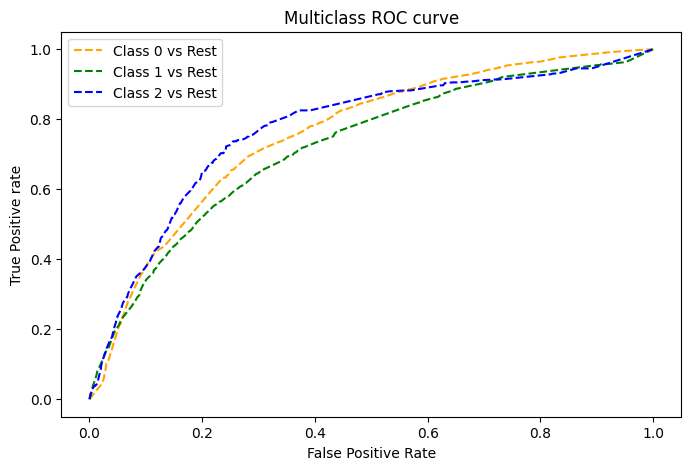

In [58]:
DT_optimized_Tomeklink = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]},
    n_iter = 250, cv = 3, verbose=2, random_state=42, n_jobs = -1,
    scoring='roc_auc'
)
DT_optimized_Tomeklink.fit(X_tl, y_tl)
# best parameters
DT_optimized_Tomeklink_best_params=DT_optimized_Tomeklink.best_params_
# Fit the Algorithm
DT_optimized_Tomeklink_data = DecisionTreeClassifier(min_samples_split=DT_optimized_Tomeklink_best_params['min_samples_split'],
                                 max_depth=DT_optimized_Tomeklink_best_params['max_depth'],
                                 min_samples_leaf=DT_optimized_Tomeklink_best_params['min_samples_leaf'],
                                 max_features=DT_optimized_Tomeklink_best_params['max_features'],
                                 random_state=0)
DT_optimized_Tomeklink_data.fit(X_tl, y_tl)
# Predict on the model

result=evaluate_model(DT_optimized_Tomeklink_data,X_tl, y_tl,X_test,y_test,'Deciosion_Tree_optimized_SMOTETomek_data')
final_dict['Decision_Tree_optimized_SMOTETomek_data']=result
     

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

We have used RandomisedSearchCV as it randomly select from all possible combination of the params grid and check until the number of iterations inputed by us. So its easy for us implement as we dont have much time to check every possible combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
Yes, after the hypertunning we have seen a improvement on the following models

* Decision Tree on original data F1 score has been increased 0.7220 to 0.7455 i.e 2.35 % increase in F1 score.

* for the Decision tree on Randon Undersampling the F1 score has been increased from 0.5609 to 0.6116 approximately 5% has been increased in F1 score.
* for the Decision tree on Tomeklink the F1 score has been increased from 0.7314 to 0.7545 approximately 2% has been increased in F1 score.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***